<a href="https://colab.research.google.com/github/kozz84/Udemy/blob/main/Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor Flow intro

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TF DATA/fake_reg.csv')

In [ ]:
df.head(3)

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015


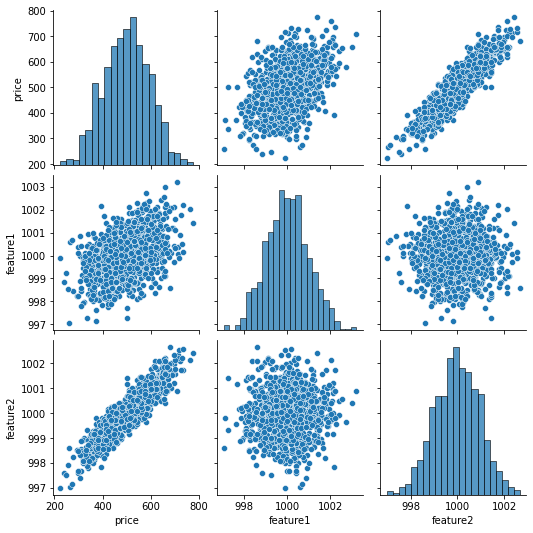

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['feature1','feature2']].values

In [ ]:
y = df[['price']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop',loss='mse')

In [ ]:
model.fit(X_train,y_train,epochs=250,verbose=1)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256709.0312
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256667.6406
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256616.8281
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256561.4688
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256500.2969
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 256432.5781
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256358.1250
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256276.3125
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 256186.8750
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 256088.6875
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255978.9688
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [ ]:
history = pd.DataFrame(model.history.history)

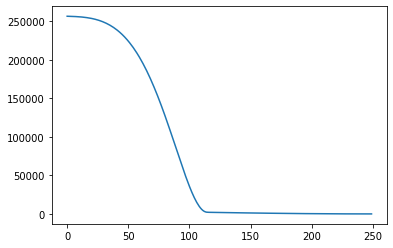

In [ ]:
plt.plot(history)

In [ ]:
model.evaluate(X_test,y_test,verbose=0)

29.329971313476562

In [ ]:
model.evaluate(X_train,y_train,verbose=0)

28.556669235229492

In [ ]:
test_predict = model.predict(X_test)

In [ ]:
test_predict = pd.Series(test_predict.reshape(300,))

In [ ]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [ ]:
pred_df = pd.concat([pred_df, test_predict],axis=1)

In [ ]:
pred_df.columns = ['test true y', 'model']

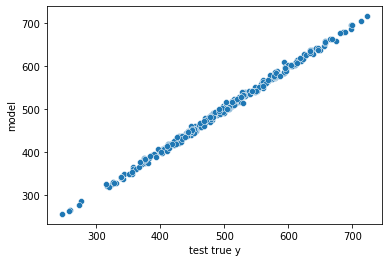

In [ ]:
sns.scatterplot(data=pred_df, x= 'test true y', y='model')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(pred_df['test true y'], pred_df['model'])

4.423302421743597

In [ ]:
mean_squared_error(pred_df['test true y'], pred_df['model'])

29.329977451396445

In [ ]:
new_gem=[[998,1000]]

In [ ]:
new_gem = scaler.transform(new_gem)

In [ ]:
model.predict(new_gem)

array([[422.9119]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_gem_model.h5')

#Tensor Flow regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
df = pd.read_csv('/content/drive/MyDrive/TF DATA/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

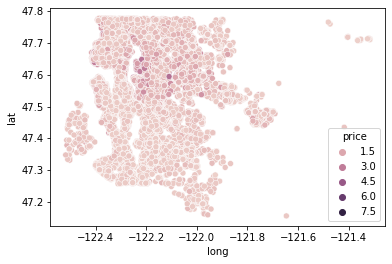

In [26]:
sns.scatterplot(data= df, x='long', y='lat', hue='price')

In [29]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [32]:
len(df)*0.01

215.97

In [33]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

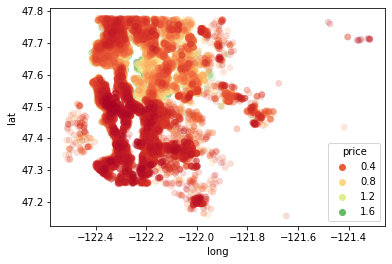

In [37]:
sns.scatterplot(data= non_top_1_perc, x='long', y='lat', hue='price', edgecolor=None, alpha =0.2,palette='RdYlGn')

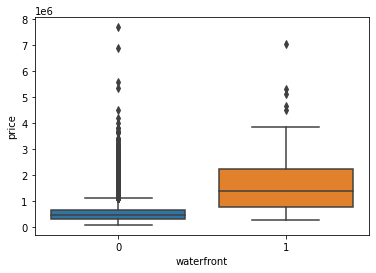

In [39]:
sns.boxplot(x='waterfront', y='price', data=df)

In [43]:
df = df.drop('id', axis=1)

In [47]:
df['date'] = pd.to_datetime(df['date'])

In [62]:
df['year'] = df['date'].apply(lambda x:x.year)
df['month'] = df['date'].apply(lambda x:x.month)

In [63]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


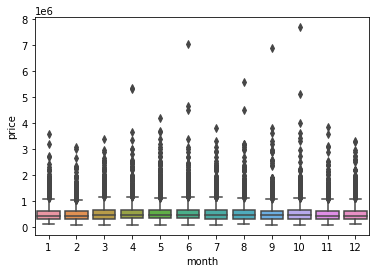

In [65]:
sns.boxplot(data=df, x='month', y='price')

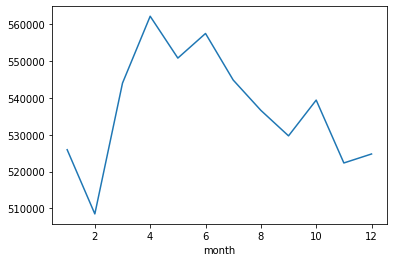

In [68]:
df.groupby('month').mean()['price'].plot()

In [69]:
df = df.drop('date',axis=1)

In [70]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [71]:
df = df.drop('zipcode',axis=1)

In [91]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [89]:
df = df.drop('yr_renovated',axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year,month
yr_renovated,,,,,,,,,,,,,,,,,,,
0,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683
1934,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1940,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1944,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1945,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
2012,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2013,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37


In [93]:
df.pivot_table(index='month', columns='year', values='price', aggfunc='mean')

year,2014,2015
month,,
1,NaN,525963.251534
2,NaN,508520.051323
3,NaN,544057.683200
4,NaN,562215.615074
5,548166.600113,558193.095975
6,557534.318182,NaN
7,544892.161013,NaN
8,536655.212481,NaN
9,529723.517787,NaN


In [94]:
X =df.drop('price', axis=1).values
y=df['price'].values

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [98]:
X_train = scaler.fit_transform(X_train)

In [99]:
X_test = scaler.transform(X_test)

In [100]:
from tensorflow.keras.models import Sequential

In [102]:
from tensorflow.keras.layers import Dense
X_train.shape

(15117, 19)

In [103]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss='mse')

In [104]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test),
          batch_size=100, 
          epochs=500,
          verbose=1)

Epoch 1/500
152/152 [==============================] - 2s 7ms/step - loss: 430181613568.0000 - val_loss: 418525380608.0000
Epoch 2/500
152/152 [==============================] - 1s 5ms/step - loss: 423225425920.0000 - val_loss: 394616569856.0000
Epoch 3/500
152/152 [==============================] - 1s 5ms/step - loss: 337062952960.0000 - val_loss: 223468306432.0000
Epoch 4/500
152/152 [==============================] - 1s 5ms/step - loss: 141690814464.0000 - val_loss: 96502521856.0000
Epoch 5/500
152/152 [==============================] - 1s 5ms/step - loss: 98195529728.0000 - val_loss: 93705953280.0000
Epoch 6/500
152/152 [==============================] - 1s 4ms/step - loss: 95612010496.0000 - val_loss: 91365933056.0000
Epoch 7/500
152/152 [==============================] - 0s 3ms/step - loss: 93121110016.0000 - val_loss: 89002754048.0000
Epoch 8/500
152/152 [==============================] - 0s 3ms/step - loss: 90542579712.0000 - val_loss: 86488219648.0000
Epoch 9/500
152/152 [====

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score

In [106]:
y_pred = model.predict(X_test)

In [107]:
mean_squared_error(y_test,y_pred)

24977097197.869286

In [108]:
mean_absolute_error(y_test,y_pred)

99027.38595679012

In [109]:
explained_variance_score(y_test,y_pred)

0.8117084049016844

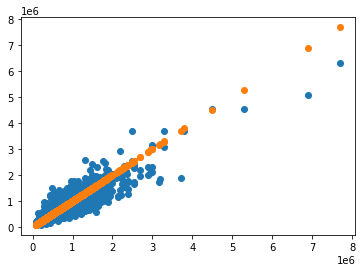

In [113]:
plt.scatter(y_test,y_pred)
plt.scatter(y_test,y_test)

In [114]:
df['price'].iloc[0]

221900.0

In [116]:
single_house = df.drop('price',axis=1).iloc[0]

In [119]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [120]:
model.predict(single_house)

array([[284176.38]], dtype=float32)